# Using LDA


In [25]:
# Sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# numpy, pandas, regex and nltk
import numpy as np
import pandas as pd
import re, nltk
import string

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

custom_stop_words = []
with open( "stopwords.txt", "r" ) as fin:
    for line in fin.readlines():
        custom_stop_words.append(line.strip())
#from observation after running it, says came up as a top term for a few topics
custom_stop_words.extend(["say", "says", "said", "saying", "tell", "tells", "told"])
print("Stopword list has %d entries" % len(custom_stop_words))

def clean_documents(raw_document):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    alphanumeric = lambda x: re.sub(r"""\w*\d\w*""", ' ', x)
    punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
    
    raw_document = raw_document.map(alphanumeric).map(punc_lower)
    return raw_document

# News Set A content as corpus
dataset = pd.read_csv("datasets/News Set A.csv")

corpus = clean_documents(dataset.content)

Stopword list has 359 entries


In [28]:
# LDA can only use raw term counts for LDA because it is a probabilistic graphical model

no_features = 500
cv = CountVectorizer(max_features=no_features, stop_words=custom_stop_words)
document_terms = cv.fit_transform(corpus)
tf_feature_names = cv.get_feature_names()

In [29]:
print(len(tf_feature_names))
tf_feature_names

500


['able',
 'act',
 'action',
 'added',
 'administration',
 'against',
 'agency',
 'ago',
 'air',
 'america',
 'american',
 'americans',
 'announced',
 'april',
 'area',
 'asked',
 'attack',
 'attacks',
 'attorney',
 'authorities',
 'away',
 'back',
 'bad',
 'barack',
 'based',
 'before',
 'began',
 'behind',
 'believe',
 'best',
 'better',
 'big',
 'bill',
 'black',
 'book',
 'border',
 'breitbart',
 'bring',
 'building',
 'bush',
 'business',
 'california',
 'call',
 'called',
 'calling',
 'came',
 'campaign',
 'candidate',
 'candidates',
 'car',
 'care',
 'carolina',
 'case',
 'cases',
 'center',
 'change',
 'chief',
 'child',
 'children',
 'china',
 'city',
 'claims',
 'clear',
 'clinton',
 'close',
 'cnn',
 'college',
 'comes',
 'comey',
 'coming',
 'comments',
 'committee',
 'community',
 'companies',
 'company',
 'conference',
 'congress',
 'conservative',
 'continue',
 'continued',
 'control',
 'convention',
 'countries',
 'country',
 'county',
 'course',
 'court',
 'crime',
 'cr

In [30]:
dt = pd.DataFrame(document_terms.toarray(), columns=tf_feature_names).set_index(dataset.id)
dt

,able,act,action,added,administration,against,agency,ago,air,america,...,women,words,work,worked,workers,working,world,wrote,york,young
id,,,,,,,,,,,,,,,,,,,,,
17283,0,1,0,0,13,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17284,0,0,0,1,0,2,0,3,0,0,...,0,0,8,3,0,1,0,3,7,8
17285,1,2,0,0,1,0,0,0,0,2,...,0,0,10,3,0,2,2,1,1,3
17286,0,0,0,0,0,0,0,3,0,0,...,3,0,0,0,0,0,5,0,2,2
17287,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73465,0,0,1,0,2,0,0,0,0,0,...,0,0,0,2,0,1,0,0,0,0
73466,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
73467,3,1,0,0,11,9,3,1,2,2,...,0,4,1,0,11,0,6,1,14,0


In [31]:
kmin= 20
kmax = 25

topic_models = []
# try each value of k
for k in range(kmin,kmax+1):
    print("Applying LDA for k=%d ..." % k )
    lda_model = LatentDirichletAllocation(n_components=k, max_iter=5, learning_method='online', learning_offset=50.,random_state=0)
    lda_output = lda_model.fit_transform(document_terms)  
    log_likelihood = lda_model.score(document_terms)
    perplexity = lda_model.perplexity(document_terms)
    print(f"\t Log likelihood: {log_likelihood}")
    print(f"\t Perplexity: {perplexity}")
    topic_models.append( (k,lda_model,lda_output, log_likelihood, perplexity) ) # store for later

Applying LDA for k=20 ...
	 Log likelihood: -31212509.057597633
	 Perplexity: 298.0301960074035
Applying LDA for k=21 ...
	 Log likelihood: -31175727.518319722
	 Perplexity: 296.036010709044
Applying LDA for k=22 ...
	 Log likelihood: -31179477.658929948
	 Perplexity: 296.2387197558673
Applying LDA for k=23 ...
	 Log likelihood: -31194866.81872406
	 Perplexity: 297.0720156138768
Applying LDA for k=24 ...
	 Log likelihood: -31232323.573138464
	 Perplexity: 299.11004173582705
Applying LDA for k=25 ...
	 Log likelihood: -31170450.741657607
	 Perplexity: 295.75101618664945


In [32]:
for model in topic_models:
  print("k topics : % 2d, Log Likelihood : % 5.2f   Perplexity : %5.2f" %(model[0], model[3], model[4]))  

k topics :  20, Log Likelihood : -31212509.06   Perplexity : 298.03
k topics :  21, Log Likelihood : -31175727.52   Perplexity : 296.04
k topics :  22, Log Likelihood : -31179477.66   Perplexity : 296.24
k topics :  23, Log Likelihood : -31194866.82   Perplexity : 297.07
k topics :  24, Log Likelihood : -31232323.57   Perplexity : 299.11
k topics :  25, Log Likelihood : -31170450.74   Perplexity : 295.75


Best k is 25, lowest perplexity at 295.75. I tried with 1000 terms and the perplexity was around 500 for the same k range.

In [33]:
# Show top 20 words in each of the 25 topics
no_top_words = 20
display_topics(lda_model, tf_feature_names, no_top_words)

Topic 0:
york city times street wall building west money time former office day group business including work public before part top
Topic 1:
cruz rubio senate bush republican senator republicans gop democrats conservative john debate florida vote nominee texas support committee leader majority
Topic 2:
clinton hillary campaign state email foundation bill presidential democratic secretary former nominee private debate department president candidate personal september speech
Topic 3:
police cnn officers gun people officer man authorities shooting killed shot video fire city reported car department friday county enforcement
Topic 4:
people think going get know want way time see cnn go right things good something lot back take got thing
Topic 5:
muslim iran israel refugees countries united states deal world state security middle east islamic nuclear order syria country war foreign
Topic 6:
women team game men film woman world best time series play win final before against back night sunda

In [35]:
# Find dominant topic for each document (showing only for first 25 docs)
# column names
topicnames = ["Topic" + str(i) for i in range(lda_model.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(len(corpus))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style to first 25 document
df_document_topic2 = df_document_topic.head(25).style.applymap(color_green).applymap(make_bold)
df_document_topic2

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13,Topic14,Topic15,Topic16,Topic17,Topic18,Topic19,Topic20,Topic21,Topic22,Topic23,Topic24,dominant_topic
Doc0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.180000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.400000,0.000000,0.030000,0.000000,0.070000,0.280000,0.000000,0.000000,0.000000,16
Doc1,0.140000,0.000000,0.000000,0.420000,0.150000,0.000000,0.000000,0.000000,0.000000,0.060000,0.000000,0.010000,0.000000,0.150000,0.000000,0.000000,0.000000,0.010000,0.050000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,3
Doc2,0.060000,0.000000,0.000000,0.000000,0.130000,0.000000,0.060000,0.090000,0.000000,0.000000,0.130000,0.010000,0.020000,0.400000,0.000000,0.030000,0.000000,0.000000,0.000000,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,13
Doc3,0.040000,0.010000,0.010000,0.000000,0.080000,0.020000,0.140000,0.000000,0.020000,0.030000,0.230000,0.020000,0.000000,0.340000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.030000,0.000000,13
Doc4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.160000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.690000,0.000000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,17
Doc5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.240000,0.390000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.330000,0.000000,13
Doc6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.510000,0.000000,0.000000,0.060000,0.080000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.170000,0.080000,0.050000,0.000000,0.000000,7
Doc7,0.040000,0.000000,0.000000,0.000000,0.440000,0.000000,0.000000,0.000000,0.030000,0.000000,0.010000,0.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.310000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4
Doc8,0.170000,0.000000,0.030000,0.000000,0.270000,0.000000,0.090000,0.000000,0.000000,0.030000,0.100000,0.000000,0.090000,0.200000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4
Doc9,0.160000,0.000000,0.000000,0.000000,0.120000,0.000000,0.010000,0.000000,0.000000,0.020000,0.000000,0.020000,0.000000,0.640000,0.000000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13


Using pyLDAvis to visualized topic models

In [36]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, document_terms, cv)
panel

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.074770  0.181473       1        1  13.767895
20    -0.159058  0.110644       2        1   7.347164
18     0.097045  0.006759       3        1   5.882550
3      0.146457  0.037299       4        1   5.392967
14    -0.209368  0.084066       5        1   4.934069
24    -0.034946 -0.051270       6        1   4.743216
13     0.173840  0.168524       7        1   4.451373
21    -0.120505 -0.030449       8        1   4.340646
22     0.058872  0.073500       9        1   4.110167
11     0.098696 -0.137389      10        1   3.982565
8      0.004894 -0.054337      11        1   3.684212
6      0.103550  0.148958      12        1   3.653828
7     -0.031956 -0.138265      13        1   3.618903
9      0.006706 -0.134145      14        1   3.614752
0      0.117902  0.077545      15        1   3.466054
10     0.124415  0.137585      16        1   3.047457
12     0.070684 -0.003989      17        1   3.041380
2     -0.157542  0.046643      18        1   2.830405
16    -0.159450  0.014190      19        1   2.810677
19     0.053439 -0.171921      20        1   2.415517
23    -0.035330 -0.022082      21        1   2.275177
5      0.009319 -0.208016      22        1   2.132004
15     0.049019 -0.047773      23        1   1.654980
1     -0.293550  0.102443      24        1   1.556713
17     0.012095 -0.189993      25        1   1.245331, topic_info=          Term           Freq          Total Category  logprob  loglift
459      trump  147472.000000  147472.000000  Default  30.0000  30.0000
63     clinton   53744.000000   53744.000000  Default  29.0000  29.0000
308      obama   32776.000000   32776.000000  Default  28.0000  28.0000
335     police   29600.000000   29600.000000  Default  27.0000  27.0000
346  president   59745.000000   59745.000000  Default  26.0000  26.0000
..         ...            ...            ...      ...      ...      ...
462    tuesday     300.345461   12430.897212  Topic25  -5.4257   0.6628
424     states     374.273143   32056.031989  Topic25  -5.2056  -0.0645
160     friday     293.597926   13708.808524  Topic25  -5.4484   0.5422
451       time     349.096660   43114.034388  Topic25  -5.2752  -0.4305
5      against     318.367012   29982.240893  Topic25  -5.3674  -0.1594

[1008 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
1         1  0.065996    act
1         2  0.000604    act
1         3  0.009428    act
1         4  0.047261    act
1         5  0.000121    act
...     ...       ...    ...
499      19  0.006581  young
499      20  0.007459  young
499      21  0.010091  young
499      22  0.000219  young
499      23  0.072063  young

[7156 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 21, 19, 4, 15, 25, 14, 22, 23, 12, 9, 7, 8, 10, 1, 11, 13, 3, 17, 20, 24, 6, 16, 2, 18])

# NFM approach

In [37]:
# TFID vectorising

from sklearn.feature_extraction.text import TfidfVectorizer
# we can pass in the same preprocessing parameters
vectorizer = TfidfVectorizer(stop_words=custom_stop_words, min_df = 20)
A = vectorizer.fit_transform(corpus)
print( "Created %d X %d TF-IDF-normalized document-term matrix" % (A.shape[0], A.shape[1]) )

Created 50000 X 28182 TF-IDF-normalized document-term matrix


In [38]:
# extract the resulting vocabulary
terms = vectorizer.get_feature_names()
print("Vocabulary has %d distinct terms" % len(terms))
terms

Vocabulary has 28182 distinct terms


['aa',
 'aaa',
 'aaron',
 'aaronkleinshow',
 'aarp',
 'ab',
 'abaaoud',
 'aback',
 'abadi',
 'abandon',
 'abandoned',
 'abandoning',
 'abandonment',
 'abated',
 'abbas',
 'abbey',
 'abbott',
 'abbreviation',
 'abby',
 'abc',
 'abcliz',
 'abcpolitics',
 'abd',
 'abdallah',
 'abdel',
 'abdelhamid',
 'abdeslam',
 'abdicate',
 'abdication',
 'abdomen',
 'abdominal',
 'abdu',
 'abducted',
 'abducting',
 'abduction',
 'abductions',
 'abdul',
 'abdulaziz',
 'abdullah',
 'abdulrahman',
 'abe',
 'abedi',
 'abedin',
 'abel',
 'aberdeen',
 'aberration',
 'abetted',
 'abetting',
 'abhor',
 'abhorrent',
 'abide',
 'abiding',
 'abigail',
 'abilities',
 'ability',
 'abject',
 'ablaze',
 'able',
 'abnormal',
 'abnormalities',
 'abnormally',
 'aboard',
 'abokhari',
 'abolish',
 'abolished',
 'abolishing',
 'abolition',
 'abolitionist',
 'abomination',
 'abort',
 'aborted',
 'abortion',
 'abortionist',
 'abortionists',
 'abortions',
 'abound',
 'abounded',
 'abounds',
 'abraham',
 'abrams',
 'abrasive',

In [39]:
from sklearn import decomposition

# Apply NMF for each of these values using a for-loop
kmin, kmax = 20, 25

topic_models = []
# try each value of k
for k in range(kmin,kmax+1):
    print("Applying NMF for k=%d ..." % k )
    # run NMF
    model = decomposition.NMF( init="nndsvd", n_components=k ) 
    W = model.fit_transform( A )
    H = model.components_    
    # store for later
    topic_models.append( (k,W,H) )

Applying NMF for k=20 ...
Applying NMF for k=21 ...
Applying NMF for k=22 ...
Applying NMF for k=23 ...
Applying NMF for k=24 ...
Applying NMF for k=25 ...


In [40]:
no_top_words = 20
display_topics(model, terms, no_top_words)

Topic 0:
trump donald campaign president republican pence presidential nominee rally white supporters cnn media washington york comments election speech conway debate
Topic 1:
women family game time life cnn children film show team home day season men world woman york mother before night
Topic 2:
clinton hillary campaign foundation emails email state bill secretary server presidential democratic nominee department clintons private women podesta debate abedin
Topic 3:
isis syria islamic syrian iraq forces military attack state turkey mosul iraqi attacks group terrorist killed fighters assad war aleppo
Topic 4:
police officers officer man shooting black shot suspect city killed attack arrested department video dallas authorities incident car enforcement people
Topic 5:
comey fbi investigation director james attorney classified information house president flynn committee general department email emails testimony justice firing former
Topic 6:
voters poll party vote election republican dem

In [41]:
len(corpus)

50000

In [42]:
class TokenGenerator:
    def __init__( self, documents, stopwords ):
        self.documents = documents
        self.stopwords = stopwords
        self.tokenizer = re.compile( r"(?u)\b\w\w+\b" )

    def __iter__( self ):
        print("Building Word2Vec model ...")
        for doc in self.documents:
            tokens = []
            for tok in self.tokenizer.findall( doc ):
                if tok in self.stopwords:
                    tokens.append( "<stopword>" )
                elif len(tok) >= 2:
                    tokens.append( tok )
            yield tokens

In [44]:
import gensim
docgen = TokenGenerator(corpus, custom_stop_words)
# # the model has 500 dimensions, the minimum document-term frequency is 20
w2v_model = gensim.models.Word2Vec(docgen, size=500, min_count=20, sg=0)

C:\ProgramData\Anaconda3\lib\site-packages\gensim\corpora\dictionary.py:11: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, defaultdict
C:\ProgramData\Anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...


In [46]:
print( "Model has %d terms" % len(w2v_model.wv.vocab) )

Model has 33004 terms


In [ ]:
w2v_model.save("w2v-modelmin20.bin") # can pickle too

In [18]:
# To re-load this model, run
w2v_model = gensim.models.Word2Vec.load("w2v-model.bin")

In [47]:
w2v_model["donald"]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 1.03005695e+00, -2.49005601e-01,  7.88215339e-01,  2.72395045e-01,
       -1.30900097e+00, -7.98654199e-01,  3.83821994e-01, -1.55934012e+00,
        6.96105123e-01,  3.76586616e-01, -3.28026146e-01,  9.90852118e-02,
       -4.48387116e-01, -3.73632386e-02,  3.56304944e-01, -1.15738404e+00,
       -1.11648273e+00, -1.46045780e+00, -9.15507078e-01, -1.24559593e+00,
        2.49504209e+00, -3.08343649e-01,  1.40956700e+00, -2.56781667e-01,
        1.22670740e-01,  1.99684486e-01,  8.17870617e-01, -2.64739305e-01,
        6.72269046e-01,  1.52807307e+00, -1.45404899e+00,  4.46387857e-01,
        3.93078893e-01, -1.21982515e-01, -2.42202356e-01, -9.90033269e-01,
        1.30873048e+00, -1.32282925e+00, -3.87950353e-02, -1.23149717e+00,
       -5.87196231e-01,  6.09252095e-01,  1.12634146e+00, -7.23371625e-01,
       -5.25221348e-01, -1.05223671e-01,  1.99194610e-01, -1.72302186e+00,
        3.36009264e-01,  1.81370690e-01,  1.06095441e-01, -6.54186249e-01,
       -1.83065057e-01, -

In [48]:
def calculate_coherence( w2v_model, term_rankings ):
    overall_coherence = 0.0
    for topic_index in range(len(term_rankings)):
        # check each pair of terms
        pair_scores = []
        for pair in combinations( term_rankings[topic_index], 2 ):
            pair_scores.append( w2v_model.wv.similarity(pair[0], pair[1]) )
        # get the mean for all pairs in this topic
        topic_score = sum(pair_scores) / len(pair_scores)
        overall_coherence += topic_score
    # get the mean score across all topics
    return overall_coherence / len(term_rankings)

Define a function that extracts the descriptor for a specified topic: 

In [50]:
def get_descriptor( all_terms, H, topic_index, top ):
     # reverse sort the values to sort the indices
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    # now get the terms corresponding to the top-ranked indices
    top_terms = []
    for term_index in top_indices[0:top]:
        top_terms.append( terms[term_index] )
    return top_terms

Process each of the models for different values of *k*:

In [51]:
from itertools import combinations
k_values = []
coherences = []
for (k,W,H) in topic_models:
    # Get all of the topic descriptors - the term_rankings, based on top 10 terms
    term_rankings = []
    for topic_index in range(k):
        term_rankings.append( get_descriptor( terms, H, topic_index, 10 ) )
    # Now calculate the coherence based on our Word2vec model
    k_values.append( k )
    coherences.append( calculate_coherence( w2v_model, term_rankings ) )
    print("K=%02d: Coherence=%.4f" % ( k, coherences[-1] ) )

K=20: Coherence=0.2700
K=21: Coherence=0.2711
K=22: Coherence=0.2700
K=23: Coherence=0.2727
K=24: Coherence=0.2708
K=25: Coherence=0.2749


Use matplotlib to generate a line plot of these coherence scores, to help us select an appropriate value.

In [53]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
matplotlib.rcParams.update({"font.size": 14})

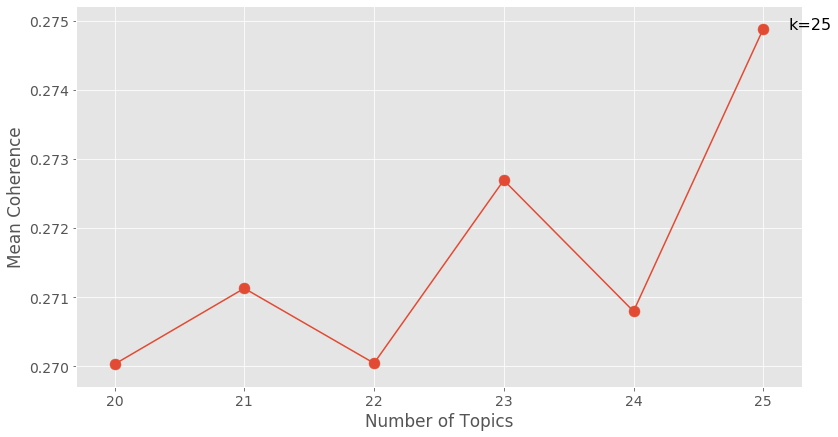

In [54]:
fig = plt.figure(figsize=(13,7))
# create the line plot
ax = plt.plot( k_values, coherences )
plt.xticks(k_values)
plt.xlabel("Number of Topics")
plt.ylabel("Mean Coherence")
# add the points
plt.scatter( k_values, coherences, s=120)
# find and annotate the maximum point on the plot
ymax = max(coherences)
xpos = coherences.index(ymax)
best_k = k_values[xpos]
plt.annotate( "k=%d" % best_k, xy=(best_k, ymax), xytext=(best_k, ymax), textcoords="offset points", fontsize=16)
# show the plot
plt.show()

The topic coherence generally increase as the number of topic K increases, which is understandable as there are 50000 documents in the corpus. For the range tested, the optimal number of topics is the highest, k=25. 

In [55]:
import numpy as np
def get_descriptor( terms, H, topic_index, top ):
    # reverse sort the values to sort the indices
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    # now get the terms corresponding to the top-ranked indices
    top_terms = []
    for term_index in top_indices[0:top]:
        top_terms.append( terms[term_index] )
    return top_terms

In [56]:
descriptors = []
for topic_index in range(k):
    descriptors.append( get_descriptor( terms, H, topic_index, 10 ) )
    str_descriptor = ", ".join( descriptors[topic_index] )
    print("Topic %02d: %s" % ( topic_index+1, str_descriptor ) )

Topic 01: trump, donald, campaign, president, republican, pence, presidential, nominee, rally, white
Topic 02: women, family, game, time, life, cnn, children, film, show, team
Topic 03: clinton, hillary, campaign, foundation, emails, email, state, bill, secretary, server
Topic 04: isis, syria, islamic, syrian, iraq, forces, military, attack, state, turkey
Topic 05: police, officers, officer, man, shooting, black, shot, suspect, city, killed
Topic 06: comey, fbi, investigation, director, james, attorney, classified, information, house, president
Topic 07: voters, poll, party, vote, election, republican, democrats, republicans, polls, points
Topic 08: breitbart, news, show, siriusxm, daily, live, bannon, discuss, conservative, media
Topic 09: cruz, ted, delegates, kasich, sen, republican, iowa, convention, gop, carson
Topic 10: korea, north, korean, missile, nuclear, kim, south, pyongyang, test, missiles
Topic 11: health, obamacare, care, bill, insurance, repeal, republicans, house, tax,

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
matplotlib.rcParams.update({"font.size": 14})

In [57]:
def plot_top_term_weights( terms, H, topic_index, top ):
    # get the top terms and their weights
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    top_terms = []
    top_weights = []
    for term_index in top_indices[0:top]:
        top_terms.append( terms[term_index] )
        top_weights.append( H[topic_index,term_index] )
    # note we reverse the ordering for the plot
    top_terms.reverse()
    top_weights.reverse()
    # create the plot
    fig = plt.figure(figsize=(13,8))
    # add the horizontal bar chart
    ypos = np.arange(top)
    ax = plt.barh(ypos, top_weights, align="center", color="green",tick_label=top_terms)
    plt.xlabel("Term Weight",fontsize=14)
    plt.tight_layout()
    plt.show()

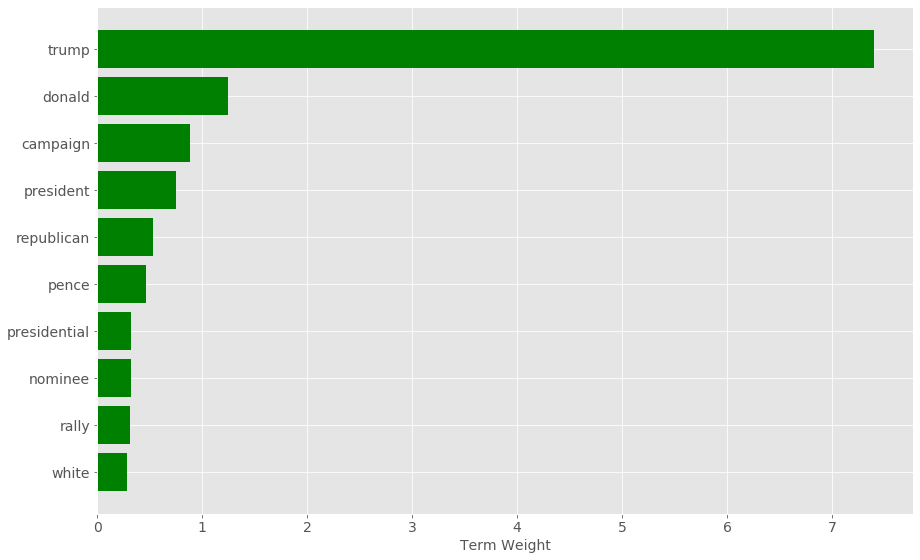

In [58]:
plot_top_term_weights( terms, H, 0, 10 )

Which topic number do you want to view?  1
How many terms?  10


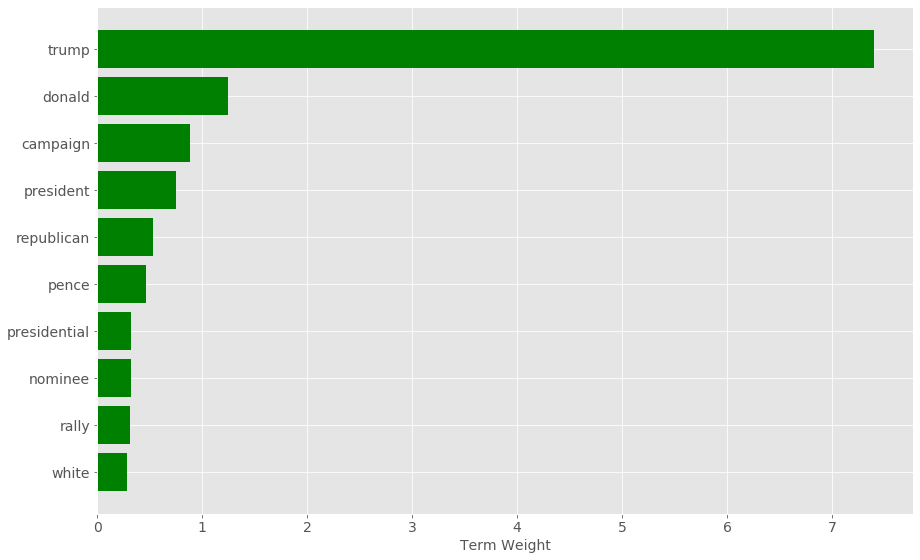

In [64]:
topic = input("Which topic number do you want to view? ")
term = input("How many terms? ")

plot_top_term_weights( terms, H, int(topic)-1, int(term) )

Top terms for the topics are related.
NFM has argubly easier to classify topics based on the top terms. 
However, LDA was faster, as you could calculate optimal number of topics k with perplexity
and log liklihood. For NFM word embedding is required, and it takes a while depending on the size of the corpus.